In [22]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram

#1. Chargeons notre ensemble de données.

In [2]:
data=pd.read_csv("/content/CC GENERAL.csv")


In [3]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
data.shape

(8950, 18)

Nous n'avons pas besoin de la colonne CUST_ID, nous la supprimerons donc.

In [15]:
data.drop("CUST_ID",axis=1,inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [17]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Il y a 313 valeurs manquantes dans MINIMUM_PAYMENTS et 1 valeur manquante dans CREDIT_LIMIT. Nous remplirons ces valeurs avec la moyenne des colonnes respectives.

In [18]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)

In [19]:
data.isnull().sum().sum()

0

In [20]:
data.duplicated().any()

False

Nous n'avons pas de doublons dans les données

Regardons si on a des outliers

In [21]:
for i in data:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if data[(data[i] > up) | (data[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

BALANCE yes
BALANCE_FREQUENCY yes
PURCHASES yes
ONEOFF_PURCHASES yes
INSTALLMENTS_PURCHASES yes
CASH_ADVANCE yes
PURCHASES_FREQUENCY no
ONEOFF_PURCHASES_FREQUENCY yes
PURCHASES_INSTALLMENTS_FREQUENCY no
CASH_ADVANCE_FREQUENCY yes
CASH_ADVANCE_TRX yes
PURCHASES_TRX yes
CREDIT_LIMIT yes
PAYMENTS yes
MINIMUM_PAYMENTS yes
PRC_FULL_PAYMENT yes
TENURE yes


Nous avons observé que la plupart de nos variables présentaient des valeurs aberrantes. Observons-le graphiquement :

<Axes: xlabel='BALANCE'>

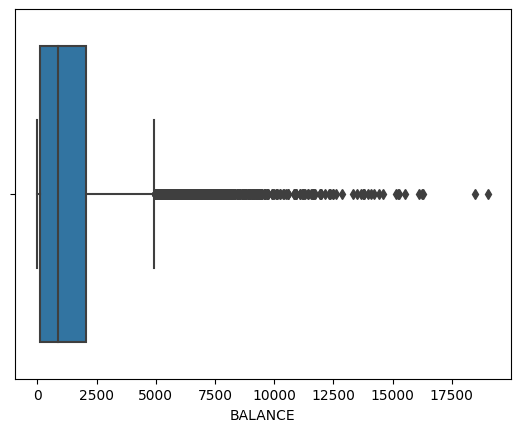

In [23]:
sns.boxplot(x=data["BALANCE"])

<Axes: xlabel='MINIMUM_PAYMENTS'>

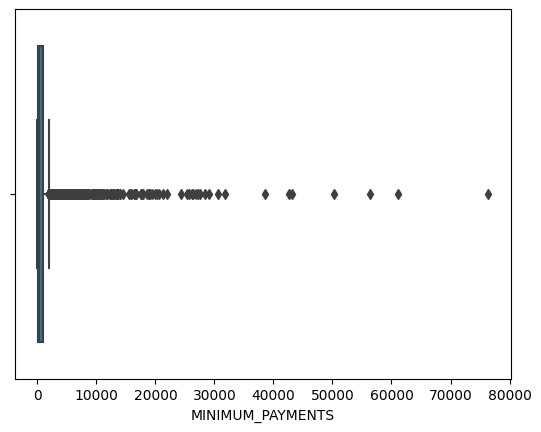

In [24]:
sns.boxplot(x=data["MINIMUM_PAYMENTS"])

Supprimons les valeurs aberrantes

In [25]:
#removing outlier except for the last column
for i in data.iloc[:,:-1]:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    data.loc[data[i] > up_lim,i] = up_lim
    data.loc[data[i] < low_lim,i] = low_lim

In [26]:
for i in data:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if data[(data[i] > up) | (data[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

BALANCE no
BALANCE_FREQUENCY no
PURCHASES no
ONEOFF_PURCHASES no
INSTALLMENTS_PURCHASES no
CASH_ADVANCE no
PURCHASES_FREQUENCY no
ONEOFF_PURCHASES_FREQUENCY no
PURCHASES_INSTALLMENTS_FREQUENCY no
CASH_ADVANCE_FREQUENCY no
CASH_ADVANCE_TRX no
PURCHASES_TRX no
CREDIT_LIMIT no
PAYMENTS no
MINIMUM_PAYMENTS no
PRC_FULL_PAYMENT no
TENURE yes


##L'analyse exploratoire des données

<ipython-input-27-97f7a54dd52f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
<ipython-input-27-97f7a54dd52f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.columns[i]], kde_kws={"colo

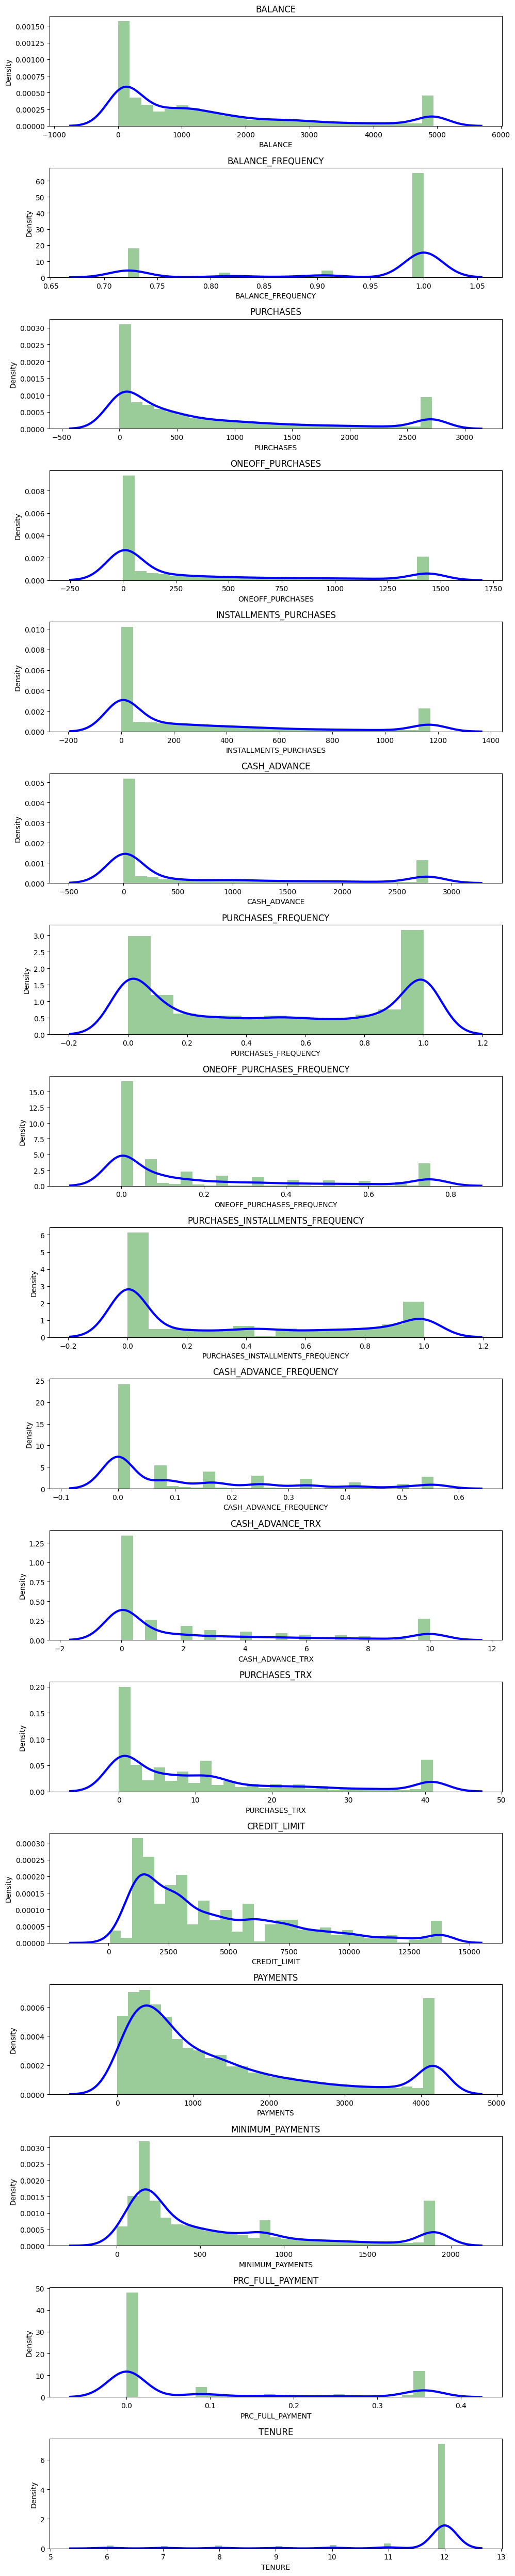

In [27]:
plt.figure(figsize=(10,50))
for i in range(len(data.columns)):
    plt.subplot(17, 1, i+1)
    #dessiner un diagramme de distribution de chaque colonne
    sns.distplot(data[data.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(data.columns[i])

plt.tight_layout()


<Axes: >

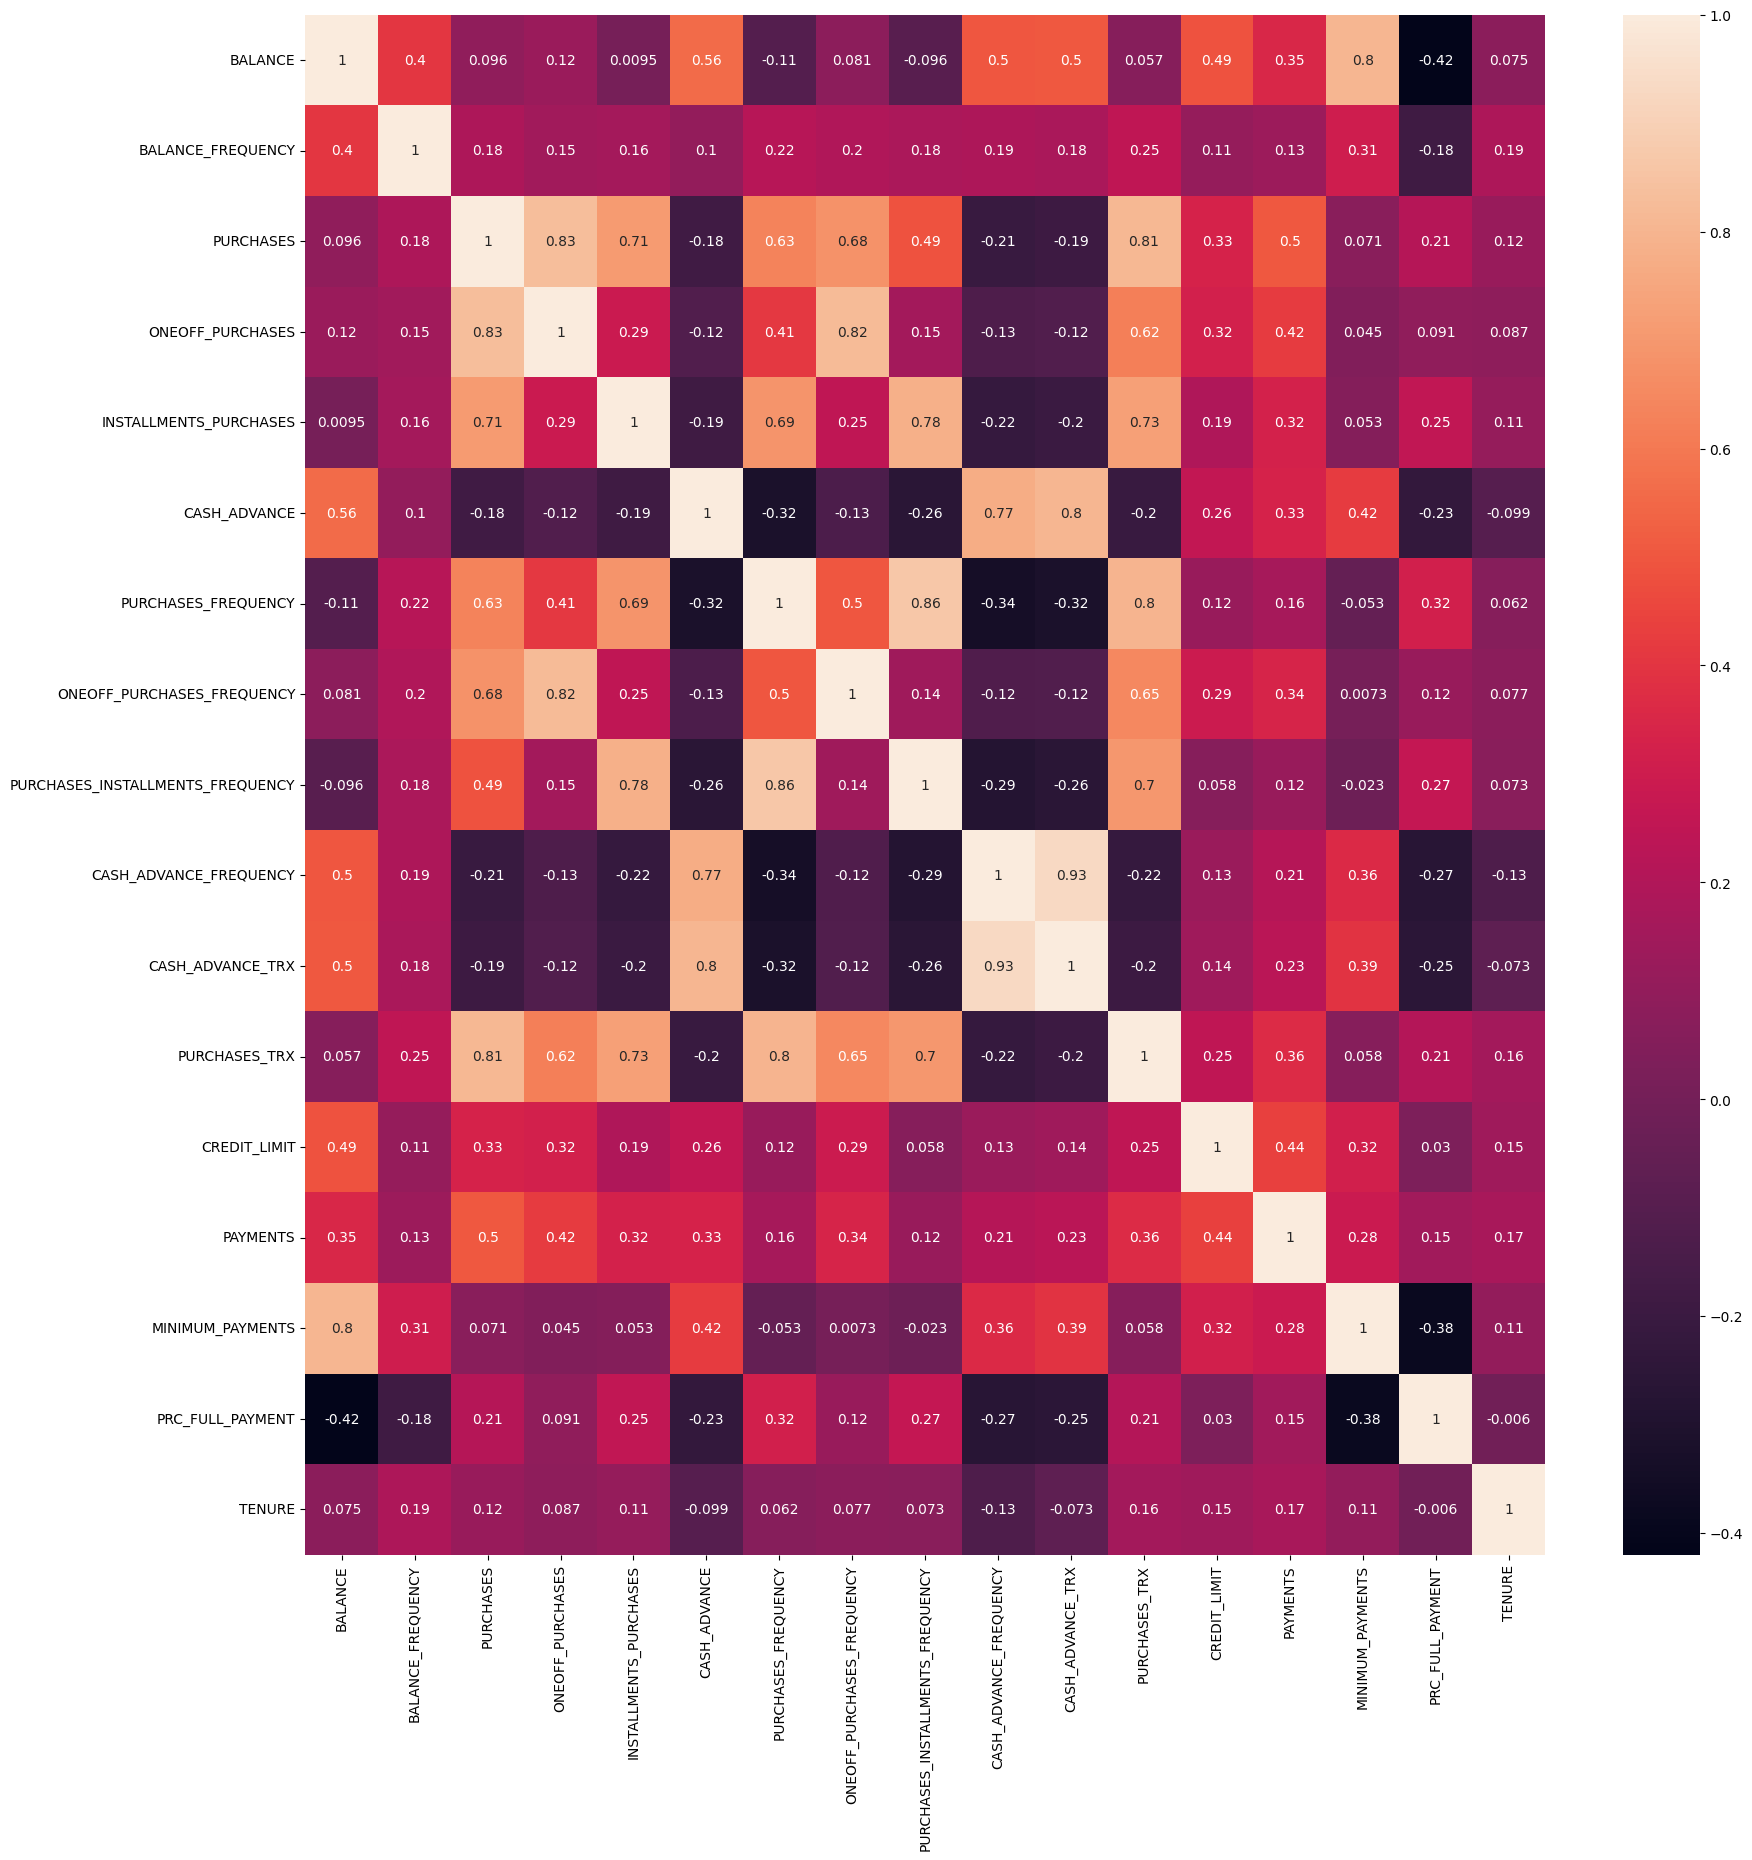

In [28]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(data.corr(), annot=True)

2. Utilisons le clustering hiérarchique pour identifier les regroupements inhérents à nos données.

In [29]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [30]:
clust_labels

array([0, 2, 2, ..., 0, 0, 0])

In [32]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,2
2,2
3,2
4,0
...,...
8945,0
8946,0
8947,0
8948,0


#Traçons les clusters.

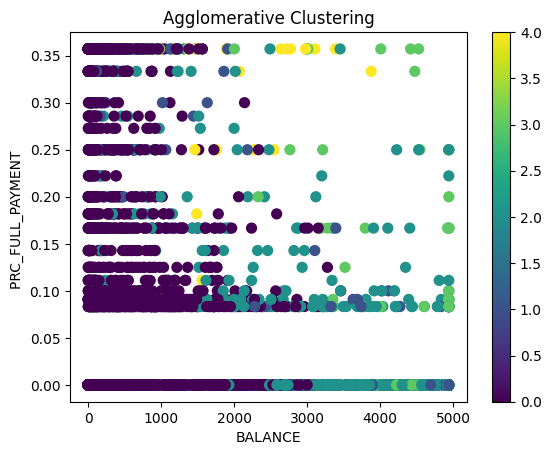

In [35]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['BALANCE'] , data ["PRC_FULL_PAYMENT"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PRC_FULL_PAYMENT ")
plt.colorbar(scatter)

# Traçons le dendrogramme. Utilisons le clustering K-means.

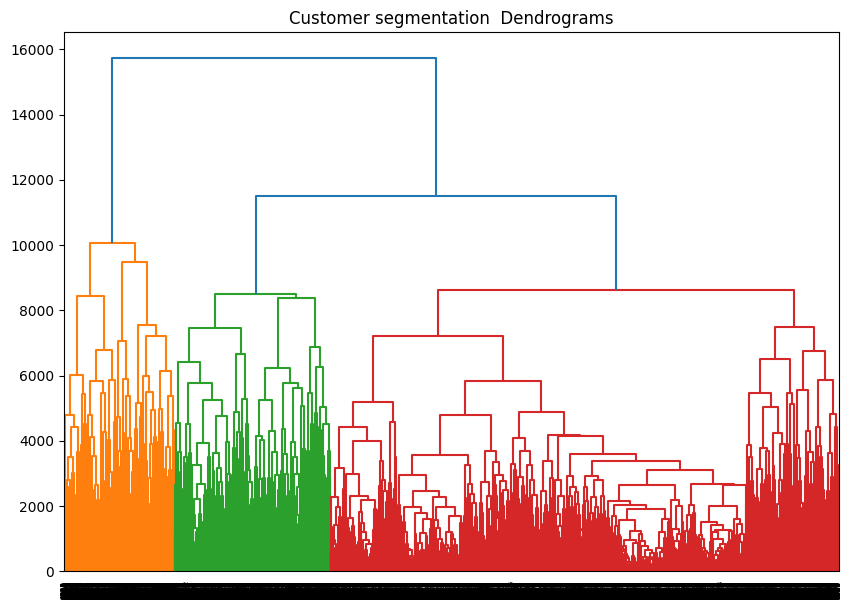

In [36]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer segmentation  Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

#5. Essayons différentes valeurs K et sélectionnons la meilleure.

In [65]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

KMeans(n_clusters=5, random_state=0)

imprimons nos étiquetes

In [66]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,4
1,2
2,3
3,3
4,4
...,...
8945,4
8946,4
8947,4
8948,4


In [63]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=4, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

KMeans(n_clusters=4, random_state=0)

imprimons nos étiquetes

In [64]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,1
1,0
2,3
3,3
4,1
...,...
8945,1
8946,1
8947,1
8948,1


Trouver le nombre optimal de clusters

Nous utiliserons la méthode des briques jaunes pour trouver le nombre optimal de clusters.

La Mise à l'échelle des données


In [45]:
df = data.copy()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Trouvons le k optimal

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

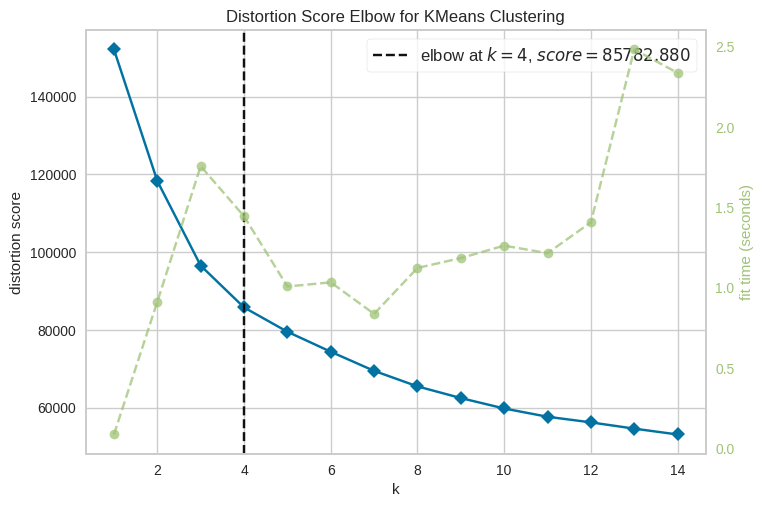

In [46]:
from yellowbrick.cluster import KElbowVisualizer
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(1,15))
visualizer.fit(df_scaled)
visualizer.poof()
plt.show()

Le nombre optimal de clusters est de 4

In [51]:
kmeans = KMeans(4)
kmeans.fit(df_scaled)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [52]:
labels

array([1, 2, 0, ..., 3, 1, 1], dtype=int32)

In [53]:
kmeans.cluster_centers_.shape
#(number of cluster points, number of columns/features)
# 4 since we are training with 4 clusters

(4, 17)

In [54]:
cluster_centers = pd.DataFrame(data= kmeans.cluster_centers_, columns = [df.columns])
cluster_centers
#centroids for each of the different features

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.300754,0.431642,1.675630,1.608046,0.986737,-0.257140,1.017183,1.510890,0.681692,-0.301829,-0.281923,1.507939,0.702268,0.934767,0.152298,0.280511,0.258844
1,-0.362989,-0.371696,-0.544717,-0.291407,-0.632440,-0.299457,-0.753577,-0.293089,-0.731421,-0.243086,-0.292555,-0.651375,-0.373288,-0.461298,-0.307303,-0.298372,-0.046004
2,1.115159,0.321530,-0.512572,-0.368172,-0.486211,1.496883,-0.664923,-0.364365,-0.568915,1.451427,1.505529,-0.550773,0.484862,0.479640,0.877677,-0.416581,-0.105405
3,-0.593110,-0.030139,-0.038678,-0.489842,0.601639,-0.574191,0.908669,-0.415847,1.053828,-0.588271,-0.572738,0.283304,-0.369221,-0.409700,-0.369195,0.579188,-0.042419


#6. Traçons  les clusters.

In [57]:
kmeans.predict(df)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.

[[ 0.30075404  0.43164155  1.67562966  1.60804595  0.98673736 -0.25714002
   1.01718312  1.51089001  0.68169196 -0.30182893 -0.28192251  1.50793877
   0.70226849  0.9347673   0.1522985   0.28051082  0.25884393]
 [-0.36298869 -0.37169622 -0.54471661 -0.2914072  -0.63244042 -0.29945654
  -0.75357678 -0.2930892  -0.73142106 -0.24308618 -0.29255473 -0.65137543
  -0.373288   -0.46129821 -0.30730315 -0.29837207 -0.04600382]
 [ 1.11515923  0.32153037 -0.51257186 -0.36817221 -0.48621132  1.49688295
  -0.66492287 -0.36436453 -0.56891454  1.45142706  1.50552886 -0.55077335
   0.4848618   0.47964044  0.87767663 -0.41658112 -0.10540482]
 [-0.59311025 -0.03013916 -0.03867816 -0.48984224  0.60163856 -0.57419133
   0.90866862 -0.41584659  1.05382838 -0.58827091 -0.57273829  0.28330445
  -0.369221   -0.40969961 -0.36919501  0.57918772 -0.04241937]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


Utilisons PCA pour reduire nos dimension à deux composantes afin de representer nos 4 clusters

In [59]:
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.62478903, -2.3816146 ],
       [-2.15838973,  2.28949666],
       [ 1.19898306,  0.28070791],
       ...,
       [-0.46320781, -2.99044414],
       [-2.41851914, -2.46663302],
       [ 0.18008632, -0.90828693]])

In [60]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.624789,-2.381615
1,-2.158390,2.289497
2,1.198983,0.280708
3,-0.495849,-0.185931
4,-1.632622,-1.597279


In [61]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.624789,-2.381615,1
1,-2.158390,2.289497,2
2,1.198983,0.280708,0
3,-0.495849,-0.185931,1
4,-1.632622,-1.597279,1


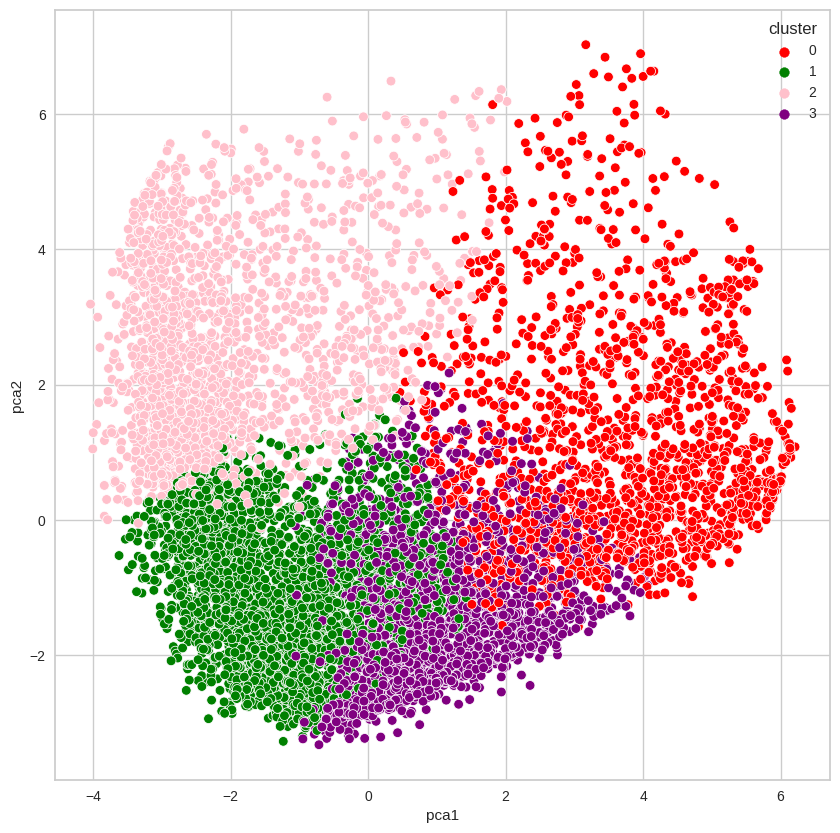

In [62]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','pink','purple'])
plt.show()

#7. Comparons les deux résultats.

On peut que la methode COUDE est plus facile pour trouver le nombre de K optimale.
Car avec le dendogramme appliqué le clustering n'est pas facile pour trouver le K optimale puisqu'on a beaucoup de variables.

Conclusion:

Compte tenu des situations d'utilisation des cartes de crédit de 9 000 personnes, nous les avons divisées en différents groupes en appliquant divers processus de regroupement. En résumé, nous avons fait ce qui suit : Nous avons essayé de trouver le nombre optimal de clusters avec différentes méthodes de clustering. Enfin, nous avons appliqué le processus PCA.

#Bonus: utlisons une autre metrique

In [67]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=5, affinity='manhattan', linkage='complete')
clust_labels=model.fit_predict(data)

In [68]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,1
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


Avec cette metrique, on est sur qu'il nous sera impossible de selection nos k clusters optimale

In [73]:
sum_of_squared_distances= []
K=range(1,15)
for k in K:
  km =KMeans(n_clusters=k)
  km = km.fit(data)
  sum_of_squared_distances.append(km.inertia_)

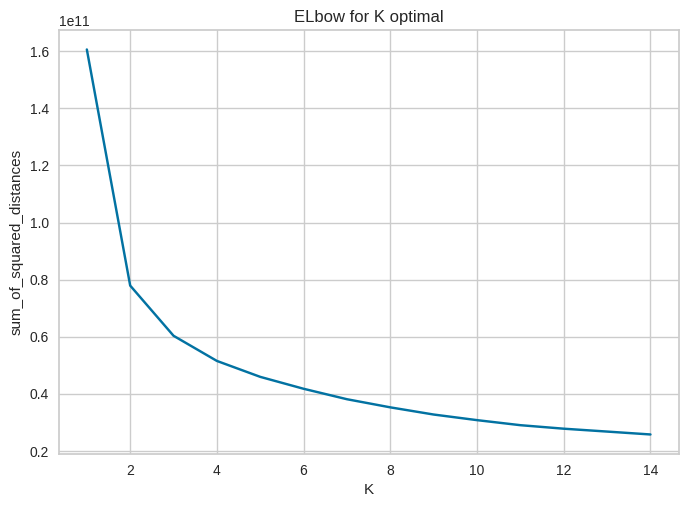

In [79]:
plt.plot(K,sum_of_squared_distances, 'bx-' )
plt.xlabel('K')
plt.ylabel('sum_of_squared_distances')
plt.title('ELbow for K optimal')
plt.show()

ici k prend trois valeurs
K=2, 3,4 (zone de COUDE)